In [22]:
import pandas as pd
df = pd.read_csv("C:/Users/MUSKAN/Downloads/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [23]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [24]:
df.isnull().sum()


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [25]:
# Categorical columns ko encode karte hain
df = pd.get_dummies(df, columns=['gender', 'race/ethnicity', 'lunch', 'test preparation course'], drop_first=True)

# Naya feature: Total score create karte hain
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']

# Naya feature: Average score
df['average_score'] = df['total_score'] / 3

# Updated dataset ka preview
print(df.head())


  parental level of education  math score  reading score  writing score  \
0           bachelor's degree          72             72             74   
1                some college          69             90             88   
2             master's degree          90             95             93   
3          associate's degree          47             57             44   
4                some college          76             78             75   

   gender_male  race/ethnicity_group B  race/ethnicity_group C  \
0        False                    True                   False   
1        False                   False                    True   
2        False                    True                   False   
3         True                   False                   False   
4         True                   False                    True   

   race/ethnicity_group D  race/ethnicity_group E  lunch_standard  \
0                   False                   False            True   
1             

        math score  reading score  writing score  total_score  average_score
count  1000.000000    1000.000000    1000.000000  1000.000000    1000.000000
mean     66.165000      69.201000      68.094375   203.312000      67.770667
std      14.922414      14.503481      15.068368    42.771978      14.257326
min      27.000000      29.000000      25.875000    27.000000       9.000000
25%      57.000000      59.000000      57.750000   175.000000      58.333333
50%      66.000000      70.000000      69.000000   205.000000      68.333333
75%      77.000000      79.000000      79.000000   233.000000      77.666667
max     100.000000     100.000000     100.000000   300.000000     100.000000


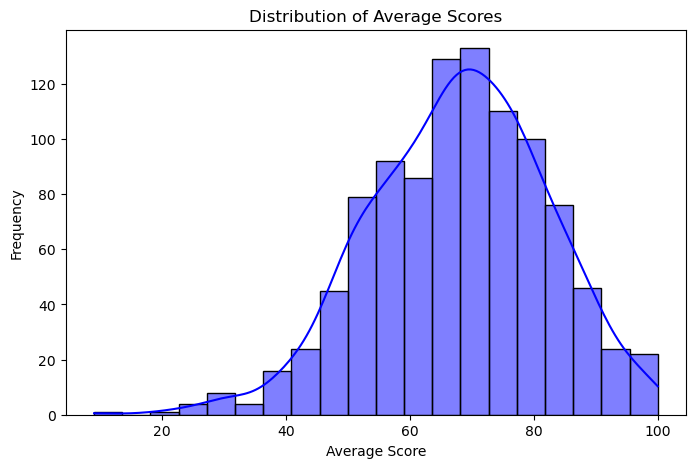

In [28]:
# Summary statistics
print(df.describe())

# Visualize the distribution of average scores
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['average_score'], kde=True, bins=20, color='blue')
plt.title("Distribution of Average Scores")
plt.xlabel("Average Score")
plt.ylabel("Frequency")
plt.show()
